# Train Minimax-Trained ML Agent

This notebook trains a `GradientBoostingClassifier` on the minimax-labelled dataset generated in generate_minimax_dataset.ipynb.  
The resulting model (`ml_agent_minimax.pkl`) is used as an AI agent in the final Connect 4 game.

## 1. Setup

Import required libraries.

In [9]:
import pandas as pd
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2. Load Dataset

Read the minimax-labelled dataset from CSV.

In [4]:
df = pd.read_csv("minimax_labelled_data.csv")
print("Rows:", len(df))
df.head()

Rows: 2000


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,...,-1,0,1,-1,-1,1,-1,1,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,-1,-1,-1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,-1,-1,1,0,1,-1,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,4
4,0,0,0,0,0,0,-1,0,0,0,...,-1,-1,-1,1,-1,1,-1,1,1,4


## 3. Prepare Features and Labels

Separate the board state features and target move labels.

In [5]:
# Split features & labels
X = df.iloc[:, :-1]  # first 42 columns = board
y = df.iloc[:, -1]   # last column = minimax move

## 4. Split Dataset

Divide the dataset into training and testing sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. Train Model

Train a `GradientBoostingClassifier` on the minimax-labelled data.

In [7]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, n_estimators=200,
                           random_state=42)

## 6. Evaluate Accuracy

Measure the model's accuracy on the test set.

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 41.25%


## 7. Export Model

Save the trained model as `ml_agent_minimax.pkl` for use in the game.

In [9]:
joblib.dump(model, "ml_agent_minimax.pkl")

['ml_agent_minimax.pkl']

## 8. Visualise Move Distribution

Plot the frequency of each optimal move in the dataset to understand how minimax prioritises different columns.

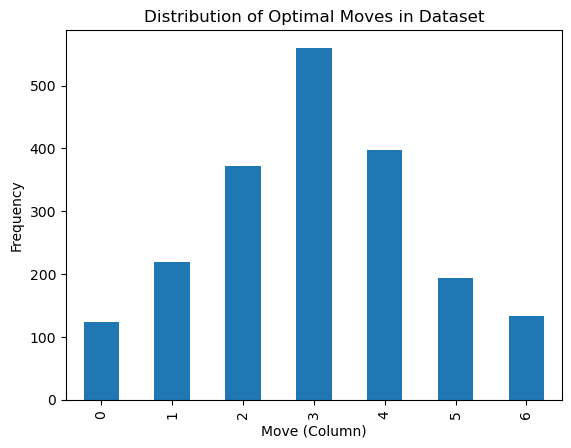

In [10]:
import matplotlib.pyplot as plt

y.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Move (Column)")
plt.ylabel("Frequency")
plt.title("Distribution of Optimal Moves in Dataset")
plt.show()